<a href="https://colab.research.google.com/github/DavoodSZ1993/Python_Tutorial/blob/main/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Useful Modules

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

## Downloading the UFO Dataset from Kaggle

In [3]:
# opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/NUFORC/ufo-sightings'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davoodsoleymanzadeh
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 126MB/s]

In [5]:
df = pd.read_csv('ufo-sightings/scrubbed.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploring UFO Dataset

Some of the useful methods are as follows:

* `pandas_profiling.ProfileReport()`: Provides an on-line Exploratory Data Analysis (EDA) experience. 

* `df.head()`: Returns the first n rows.
* `df.tail()`: Returns the last n rows.
* `df.describe()`: Generates descreptive statistics.
* `df.info()`: Prints a concise summary of a DataFrame.
* `df.loc()`: Accesses a group od rows and columns by labels or a boolean array.
* `df.at()`: Access a single value for a row/column label pair.
* `df.sample()`: Returns a random sample of items from an axis of object. 
* `df.first_valid_index()`: Returns index for the first non-NA value or None, if no non-NA value is found. 
* `df.shape`: Get the number rows & columns as a tuple.

In [6]:
#pandas_profiling.ProfileReport()

from pandas_profiling import ProfileReport

profile = ProfileReport(df.copy(),title='UFO Report', html={'style': {'full_width': True}})
# profile.to_notebook_iframe()

# to save/output the file
profile.to_file(output_file='ufo_report.html')

display.clear_output()

In [7]:
# df.head()
df.head(5)                                     # Shows the first 5 rows of the dataset.

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [8]:
#df.tail()
df.tail(5)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778


In [9]:
# df.describe()
df.describe(include='all')

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332,80332.000000
unique,69586,19900,67,5,29,706,8349,79997,317,23312,NaN
top,7/4/2010 22:00,seattle,ca,us,light,300,5 minutes,Fireball,12/12/2009,47.6063889,NaN
freq,36,525,9655,65114,16565,7070,4716,11,1510,481,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.772885
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.697205
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-176.658056
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-112.073333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.903611
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.755000


In [10]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [11]:
# df.loc
df.loc[20:30]  # rows from 20 to 30

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
20,10/10/1974 21:30,cardiff (uk/wales),NaN,gb,disk,1200,20 minutes,back in 1974 I was 19 at the time and lived i...,2/1/2007,51.5,-3.200000
21,10/10/1974 23:00,hudson,ks,us,light,1200,one hour?,The light chased us.,7/25/2004,38.1055556,-98.659722
22,10/10/1975 17:00,north charleston,sc,us,light,360,5-6 minutes,Several Flashing UFO lights over Charleston Na...,2/14/2008,32.8544444,-79.975000
23,10/10/1976 20:30,washougal,wa,us,oval,60,1 minute,Three extremely large lights hanging above nea...,2/7/2014,45.5827778,-122.352222
24,10/10/1976 22:00,stoke mandeville (uk/england),NaN,gb,cigar,3,3 seconds,White object over Buckinghamshire UK.,12/12/2009,51.783333,-0.783333
25,10/10/1977 12:00,san antonio,tx,us,other,30,30 seconds,i was about six or seven and my family and me ...,2/24/2005,29.4238889,-98.493333
26,10/10/1977 22:00,louisville,ky,us,light,30,approx: 30 seconds,HBCCUFO CANADIAN REPORT: Pilot Sighting Of Un...,3/17/2004,38.2541667,-85.759444
27,10/10/1978 02:00,elmont,ny,us,rectangle,300,5min,A memory I will never forget that happened men...,2/1/2007,40.7008333,-73.713333
28,10/10/1979 00:00,poughkeepsie,ny,us,chevron,900,15 minutes,1/4 moon-like&#44 its &#39chord&#39 or flat s...,4/16/2005,41.7002778,-73.921389
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885


In [48]:
utah_df = df.loc[df['state'] == 'ut']
utah_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
364,10/11/2005 16:00,canyonlands np,ut,NaN,formation,600,10 minutes,((NUFORC Note: Possible satellites. PD)) Ne...,10/20/2005,39.32098,-111.093731
365,10/11/2005 16:36,lake point,ut,us,light,720,about 12 mins,Lights near Lake Point/Grantsville&#44 UT,10/20/2005,40.6808333,-112.262222
433,10/11/2011 15:00,cedar city,ut,us,light,8,8 seconds,Bright&#44 white&#44 star-like UFO over Cedar ...,10/19/2011,37.6775000,-113.061111
641,10/1/1998 00:00,logan,ut,us,triangle,120,a few minutes,We saw 5 triangular objects moving at high alt...,7/5/1999,41.7355556,-111.833611
722,10/1/2002 22:30,riverton,ut,us,unknown,120,2 minutes,Red and blue flashing lights&#44 low to the gr...,8/7/2007,40.5219444,-111.938333
...,...,...,...,...,...,...,...,...,...,...,...
79298,9/5/1999 21:33,cedar city,ut,us,light,3.0,00:03,flashing light high in sky.,9/12/1999,37.6775,-113.061111
79358,9/5/2005 22:47,wendover,ut,us,cigar,30.0,30 secs,We were headed on 80east heading east and we s...,10/11/2005,40.737222,-114.036667
79625,9/6/2010 20:15,willard,ut,us,light,300.0,3-5 minutes,Curiously suspended lights in Box Elder County...,11/21/2010,41.409167,-112.035278
79823,9/7/2011 00:22,heber city,ut,us,disk,180.0,>3 minutes,11 lights on unexplained object hovering for s...,10/10/2011,40.506944,-111.412500


In [12]:
# df.at()
df.at[10, 'latitude']

'33.9163889'

In [13]:
# df.sample()
df.sample(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
62589,7/4/2013 06:50,selangor (malaysia),NaN,NaN,sphere,120,1-2 minute,3 purple object flying in Selangor&#44 cheras ...,7/14/2013,3.509247,101.524805
80142,9/9/2000 22:30,dahlonega,ga,us,changing,3600.0,at least 1 hour,A stationary bowl shaped object with colored l...,9/17/2000,34.5325,-83.985000
32712,3/21/2005 12:20,scottsdale,az,us,triangle,180,3 minutes,I observed three bright white lights arranged ...,4/16/2005,33.5091667,-111.898333
48526,6/14/2011 22:30,lindon,ut,us,rectangle,180,3 mins,Bright object moving through sky over Utah.,6/20/2011,40.3433333,-111.720000
54284,6/8/2005 22:00,phoenix,az,us,light,300,1/2 hr.,Bright Lights seen West side of Phoenix.,12/7/2006,33.4483333,-112.073333


In [ ]:
# df.first_valid_index()
df.latitude.first_valid_index()

0

In [ ]:
# Accessing elements directly
df['latitude'][100]

'47.6063889'

In [24]:
# df.shape
df.shape

(80332, 11)

## Modifying the UFO Dataset:

* `df.copy()`: makes a copy of this object's indices and data.
* `df.columns()`: returns the column labels of the DataFrame.
* `pandas.to_numeric()`: Converts arguments to a numeric type.
* `df.sort_values()`: Sort the values along either exis.
* `df.drop()`: drops specified labels from rows or columns.
* `df.sum()`: Returns the sum of the values over the requested axis.

In [14]:
# df.copy()

df1 = df.copy()
df.head(5)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [15]:
#df.columns
cols = list(df1.columns.values)
cols

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude ']

In [16]:
#pandas.to_numeric

df1['latitude'] = pd.to_numeric(df1['latitude'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80331 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(2), object(9)
memory usage: 6.7+ MB


In [17]:
df1['duration (seconds)'] = pd.to_numeric(df1['duration (seconds)'], errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80329 non-null  float64
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80331 non-null  float64
 10  longitude             80332 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.7+ MB


In [18]:
# df.sort_values
df1 = df1.sort_values('duration (seconds)')
df1.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
4081,10/23/2008 04:45,remote,wy,NaN,flash,0.001,0.001sec,brilliant strobe light at 4am&#44 moving light...,1/10/2009,-46.163992,169.875050
70587,8/30/2002 13:45,kerry (republic of ireland),NaN,NaN,sphere,0.010,0.01secs,The object seemed to move at lightining speed,9/13/2002,52.154461,-9.566863
42378,5/15/1987 23:00,island lake,il,us,light,0.010,milliseconds,4 red laser like lines,1/12/2012,42.276111,-88.191944
70393,8/29/2002 23:45,toledo,or,us,triangle,0.010,millisecond,The object I saw was very clear and moved at ...,9/6/2002,44.621667,-123.937222
52996,6/30/2002 03:15,helsinki (finland),NaN,NaN,unknown,0.010,0.01sec,Overpassing UFO,7/1/2002,60.173324,24.941025


In [19]:
df1 = df1.sort_values(['duration (seconds)', 'latitude'], ascending=False)
df1.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
559,10/1/1983 17:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,4/12/2013,52.466667,-1.916667
53384,6/3/2010 23:30,ottawa (canada),on,ca,other,82800000.0,23000hrs,((HOAX??)) I was out in a field near mil&#44 ...,7/6/2010,45.416667,-75.700000
74660,9/15/1991 18:00,greenbrier,ar,us,light,66276000.0,21 years,Orange or amber balls or orbs of light multipl...,3/31/2008,35.233889,-92.387500
64390,8/10/2012 21:00,finley,wa,us,light,52623200.0,2 months,There have been several flying objects in a pe...,8/19/2012,46.154167,-119.032778
38261,4/2/1983 24:00,dont know,NaN,NaN,NaN,52623200.0,2 months,Hi&#44 I&#8217;m writing to you because I wan...,7/25/2004,41.730561,-78.682099


In [20]:
# df.drop() ...axis=0 means along rows & axis=1 means along columns

df1 = df1.drop('duration (hours/min)', axis=1)
df1.head(5)

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
559,10/1/1983 17:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,Firstly&#44 I was stunned and stared at the ob...,4/12/2013,52.466667,-1.916667
53384,6/3/2010 23:30,ottawa (canada),on,ca,other,82800000.0,((HOAX??)) I was out in a field near mil&#44 ...,7/6/2010,45.416667,-75.700000
74660,9/15/1991 18:00,greenbrier,ar,us,light,66276000.0,Orange or amber balls or orbs of light multipl...,3/31/2008,35.233889,-92.387500
64390,8/10/2012 21:00,finley,wa,us,light,52623200.0,There have been several flying objects in a pe...,8/19/2012,46.154167,-119.032778
38261,4/2/1983 24:00,dont know,NaN,NaN,NaN,52623200.0,Hi&#44 I&#8217;m writing to you because I wan...,7/25/2004,41.730561,-78.682099


In [25]:
# df.sum()

total_time = df1['duration (seconds)'].sum()
total_time

724344717.9610001

## Querrying and Sorting

* `df.index()`: The index (raw labels) of the DataFrame.
* `pandas.option_context()`: Context manager to temporarily set options in the *with* statement context.
* `df.value_counts()`: Returns a series containing counts of unique rows in the DataFrame.
* `df.groupby()`: Groups DataFrame using a mapper or by  a series of columns.

In [29]:
# df.index()
df2 = df.copy()
df2['duration (seconds)'].index


RangeIndex(start=0, stop=80332, step=1)

In [31]:
# Querrying
df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')
df2['duration (seconds)'] = pd.to_numeric(df2['duration (seconds)'], errors='coerce')

bool_latitude = df2['latitude'] > 42
bool_duration = df2['duration (seconds)'] > 1000

df2 = df2.drop(df2.loc[bool_latitude].index, axis=0)
df2 = df2.drop(df2.loc[bool_duration].index, axis=0)
df2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167


In [39]:
# pd.option_context()
with pd.option_context('display.max_rows', 200,'display.max_columns', 4):
  display.display(df2)

,datetime,city,...,latitude,longitude
3,10/10/1956 21:00,edna,...,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,...,21.418056,-157.803611
5,10/10/1961 19:00,bristol,...,36.595000,-82.188889
8,10/10/1966 20:00,pell city,...,33.586111,-86.286111
9,10/10/1966 21:00,live oak,...,30.294722,-82.984167
...,...,...,...,...,...
80323,9/9/2013 21:00,gainesville,...,29.651389,-82.325000
80324,9/9/2013 21:00,hamstead (hollyridge),...,34.367594,-77.710548
80326,9/9/2013 21:00,woodstock,...,34.101389,-84.519444
80327,9/9/2013 21:15,nashville,...,36.165833,-86.784444


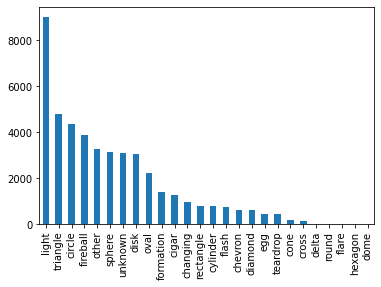

In [41]:
# value_counts()
x = df2['shape'].value_counts()
df2['shape'].value_counts().plot.bar()

In [43]:
# df.groupby()
y = df2.groupby(['shape']).mean()
y

,duration (seconds),latitude,longitude
shape,,,
changing,300.267650,34.530800,-88.701659
chevron,170.028072,34.994242,-91.064543
cigar,217.044892,34.709922,-86.525370
circle,225.389078,34.308173,-85.475971
cone,218.595376,33.312136,-77.955177
cross,226.100775,34.734505,-90.386017
cylinder,214.714375,34.511566,-87.699700
delta,348.750000,35.860694,-86.991667
diamond,247.693959,34.622447,-87.225471


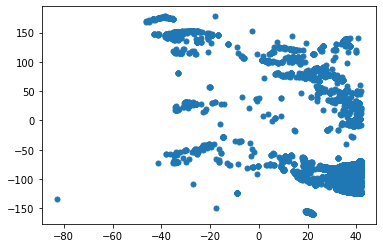

In [47]:
# plotting
plt.plot(df2['latitude'], df2['longitude '], linestyle='None', marker='o', markersize=5)

In [51]:
# loop in DataFrame
df2 = df.copy()
df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')

for i, lat, long in zip(df2.index, df2['latitude'],df2['longitude ']):
  if (lat>37 and lat<41) and (long>-114 and long<-109):
    df2.at[i, 'Utah'] = True
  elif (lat>41 and lat<42) and (long>-114 and long<-111):
    df2.at[i, 'Utah'] = True
  else:
    df2.at[i, 'Utah'] = False

df2


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Utah
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,False
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,False
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,False
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,False
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,False
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,False
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,False
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,False
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,False


## Further Reading:

* [Pandas Documentation](https://pandas.pydata.org/docs/index.html)
* [User Guide for Pandas](https://jovian.ai/outlink?url=https%3A%2F%2Fpandas.pydata.org%2Fdocs%2Fuser_guide%2Findex.html)
* [Analyzing Tabular Data using Python and Pandas](https://jovian.ai/aakashns/python-pandas-data-analysis#C215) by [Aakash Rao N S](https://jovian.ai/aakashns)